In [38]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint



In [42]:
#load data
spy_df = pd.read_csv('SPY.csv')
spy_df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-15,167.970001,168.389999,167.679993,168.149994,139.961975,69450600
1,2013-07-16,168.259995,168.360001,167.070007,167.520004,139.437653,88702100
2,2013-07-17,168.160004,168.479996,167.729996,167.949997,139.795578,92873900
3,2013-07-18,168.309998,169.270004,168.199997,168.869995,140.561310,103620100
4,2013-07-19,168.520004,169.229996,168.309998,169.169998,140.811020,103831700


In [44]:
#take random sets of sequential rows
new_set = []

for row_set in range(0,100000): #look through the data 100,000 times
    if row_set&2000==0: print(row_set)
    row_quant = randint(10, 30) # 10 - 30 days 
    row_start = randint(0, len(spy_df)-row_quant)
    market_subset = spy_df.iloc[row_start:row_start+row_quant]
    
    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date) 
    #Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1))
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change()
    Volume_Gap = market_subset['Volume'].pct_change()
    Daily_Change = (market_subset['Close'] - market_subset['Open'])/market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))

0
2015-10-26
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
2020-09-21
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2019-05-08
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
2022-07-22
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
2014-03-27
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
2020-11-09
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
2020-02-24
12288

2016-03-07
86016
86017
86018
86019
86020
86021
86022
86023
86024
86025
86026
86027
86028
86029
86030
86031
86048
86049
86050
86051
86052
86053
86054
86055
86056
86057
86058
86059
86060
86061
86062
86063
2019-11-26
88064
88065
88066
88067
88068
88069
88070
88071
88072
88073
88074
88075
88076
88077
88078
88079
88096
88097
88098
88099
88100
88101
88102
88103
88104
88105
88106
88107
88108
88109
88110
88111
2017-12-20
90112
90113
90114
90115
90116
90117
90118
90119
90120
90121
90122
90123
90124
90125
90126
90127
90144
90145
90146
90147
90148
90149
90150
90151
90152
90153
90154
90155
90156
90157
90158
90159
2018-09-14
92160
92161
92162
92163
92164
92165
92166
92167
92168
92169
92170
92171
92172
92173
92174
92175
92192
92193
92194
92195
92196
92197
92198
92199
92200
92201
92202
92203
92204
92205
92206
92207
2020-03-18
94208
94209
94210
94211
94212
94213
94214
94215
94216
94217
94218
94219
94220
94221
94222
94223
94240
94241
94242
94243
94244
94245
94246
94247
94248
94249
94250
94251
94252
942

In [46]:
len(market_subset)

13

In [47]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)

new_set_df = new_set_df.dropna(how='any')
print(new_set_df.shape)
new_set_df.tail(20)

(2000613, 8)
(1800613, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
1636,99998,2020-01-27,0.006877,0.001527,0.002214,-0.112061,0.004780,15746000.0
1637,99998,2020-01-27,-0.001525,0.002012,0.002823,0.334404,-0.000061,9223800.0
1638,99998,2020-01-27,0.002260,0.001217,0.001285,0.146799,0.002566,-18006300.0
1639,99998,2020-01-27,0.008318,0.005775,0.006692,-0.249891,0.003700,41795700.0
1640,99998,2020-01-27,0.003113,0.003808,0.004249,0.773274,0.000754,-18103600.0
1641,99998,2020-01-27,-0.001958,0.000000,-0.000091,-0.188882,0.001209,-28827500.0
1642,99998,2020-01-27,0.000121,0.002318,0.001058,-0.370808,-0.002709,3048100.0
1643,99998,2020-01-27,0.001147,-0.002343,-0.005315,0.062314,0.003297,35615400.0
1644,99998,2020-01-27,-0.008893,0.001084,-0.006223,0.685399,-0.011040,-3515900.0
2147,99999,2022-02-07,-0.019631,-0.023281,-0.014736,0.652817,-0.017012,49512700.0


In [48]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
548,0,2015-10-26,0.008667,0.007136,0.012503,-0.124990,0.006840,176465000.0
549,0,2015-10-26,-0.002248,0.012375,0.004385,1.772064,-0.001450,-52389100.0
550,0,2015-10-26,-0.021429,-0.020750,-0.021678,-0.189784,-0.001329,-117931300.0
551,0,2015-10-26,0.005168,-0.005033,0.001282,-0.527285,0.000102,48164700.0
552,0,2015-10-26,-0.012980,-0.016289,-0.013575,0.455561,0.000155,-61100300.0


In [49]:
 #create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)
 
    

In [50]:
new_set_df.tail(10)

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
2148,99999,2022-02-07,H,H,H,-83786600.0,HHH
2149,99999,2022-02-07,L,L,H,18393800.0,LLH
2150,99999,2022-02-07,L,M,L,-36512800.0,LML
2151,99999,2022-02-07,L,L,L,14579100.0,LLL
2152,99999,2022-02-07,H,M,H,-12206000.0,HMH
2153,99999,2022-02-07,H,M,H,-29096000.0,HMH
2154,99999,2022-02-07,H,L,H,-5794400.0,HLH
2155,99999,2022-02-07,H,M,H,663400.0,HMH
2156,99999,2022-02-07,L,M,L,430000.0,LML
2157,99999,2022-02-07,H,M,H,-33981500.0,HMH


In [51]:
new_set_df['Outcome_Next_Day_Direction'].describe()

count    1.800613e+06
mean    -9.968934e+03
std      3.421176e+07
min     -1.876507e+08
25%     -1.727020e+07
50%     -6.092000e+05
75%      1.620450e+07
max      2.307130e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [52]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2015-10-26,"{HMH, LHM, LLM, HLM, LHM, MLL, LHH, MML, LHL, ..."
1,1,2018-08-13,"{MLL, HHH, HLH, HLH, MMM, MMM, MLL, LHM}"
2,2,2018-08-31,"{LLL, HMM, MLL, HHH, HLH, HLH, MMM, MMM, MLL, ..."
3,3,2019-06-21,"{MLM, LHL, LML, HLH, HMM, HMH, HMH, HLM, MML, ..."
4,4,2020-07-08,"{MLL, HHH, HLH, HHH, HHH, LLM, HHH, HLH, LMM, ..."


In [53]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()


(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,-4.843008e+03
std,28867.657797,3.698496e+06
min,0.000000,-4.439456e+07
25%,24999.750000,-1.553570e+06
50%,49999.500000,-9.245417e+04
75%,74999.250000,1.420133e+06
max,99999.000000,4.269736e+07


In [54]:
 
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()


(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2015-10-26,"{HMH, LHM, LLM, HLM, LHM, MLL, LHH, MML, LHL, ...",-1.091021e+06
1,1,2018-08-13,"{MLL, HHH, HLH, HLH, MMM, MMM, MLL, LHM}",1.484950e+06
2,2,2018-08-31,"{LLL, HMM, MLL, HHH, HLH, HLH, MMM, MMM, MLL, ...",9.992917e+04
3,3,2019-06-21,"{MLM, LHL, LML, HLH, HMM, HMH, HMH, HLM, MML, ...",1.299106e+06
4,4,2020-07-08,"{MLL, HHH, HLH, HHH, HHH, LLM, HHH, HLH, LMM, ...",-1.277379e+06


In [55]:
# # reduce set 

# compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2015-10-26,"HMH,LHM,LLM,HLM,LHM,MLL,LHH,MML,LHL,MMM,HMH,ML...",-1.091021e+06
1,1,2018-08-13,"MLL,HHH,HLH,HLH,MMM,MMM,MLL,LHM",1.484950e+06
2,2,2018-08-31,"LLL,HMM,MLL,HHH,HLH,HLH,MMM,MMM,MLL,LHM,LLL,HL...",9.992917e+04
3,3,2019-06-21,"MLM,LHL,LML,HLH,HMM,HMH,HMH,HLM,MML,MLM,HMM,MM...",1.299106e+06
4,4,2020-07-08,"MLL,HHH,HLH,HHH,HHH,LLM,HHH,HLH,LMM,LHL,LHL,HM...",-1.277379e+06


In [56]:
# use last x days of data for validation


compressed_set_validation = compressed_set[pd.to_datetime(compressed_set['Close_Date']) >= datetime.datetime.now() 
                                           - datetime.timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation.shape

(2473, 4)

In [57]:
compressed_set = compressed_set[pd.to_datetime(compressed_set['Close_Date']) < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(97527, 4)

In [58]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [59]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [60]:
compressed_set['Outcome_Next_Day_Direction'].describe()


count    9.752700e+04
mean    -1.302412e+03
std      3.734000e+06
min     -4.439456e+07
25%     -1.565180e+06
50%     -9.166842e+04
75%      1.445663e+06
max      4.269736e+07
Name: Outcome_Next_Day_Direction, dtype: float64

In [61]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

97527


2538

In [62]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))   

all moves: 97527
big moves only: 2538


In [63]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
76,76,"MLM,MHM,MLM,LHL,HMH,HMH,HMM,HMH,MLM,MMM,MHM,HM...",1
129,129,"HMM,MLM,HHH,MHM,HLH,LHL,HLH,HHH",1
131,131,"HHH,LHL,MLH,MMH,LHM,HLH,MMM,MMM,MMM,LHL,LML,LM...",1
157,157,"LLM,HHH,MMH,HHH,LLM,HHH,HML,LHL",1
213,213,"HLH,HLM,HHH,LML,LHL,HLM,HMH,HMH,MLM",0


In [64]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(1462, 2)
(1076, 2)


In [65]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [66]:
compressed_set['Outcome_Next_Day_Direction'].head()      

76     1
129    1
131    1
157    1
213    0
Name: Outcome_Next_Day_Direction, dtype: int64

In [77]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    
    # Split 'pairs' into two separate columns 'x' and 'y'
    grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(",", expand=True)
#     grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(",", 1).str----------EDIT
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    
    #del grid_Df.index.name--------------------EDIT
    grid_Df.index.name = None 
    
    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)

In [78]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

In [79]:
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.000000,0.0,0.000000,0.112732,0.0,0.142251,0.115037,0.000000,0.000000,0.000000,...,0.377358,0.000000,0.60,0.000000,0.058974,0.109155,0.316406,0.0,0.261438,0.147541
HHL,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.019531,0.0,0.000000,0.000000
HHM,0.000000,0.0,0.000000,0.035367,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.144366,0.091797,0.0,0.000000,0.000000
HLH,0.271739,0.0,0.603113,0.047745,0.0,0.063694,0.096960,0.636364,0.109859,0.030899,...,0.088050,0.116279,0.07,0.074627,0.558974,0.334507,0.193359,0.0,0.437908,0.090164
HLL,0.018395,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [80]:
grid_pos.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.020537,0.0,0.00000,0.020035,0.0,0.001517,0.006154,0.947368,0.020161,0.000000,...,0.000000,0.000000,0.000000,0.032573,0.000000,0.021186,0.011609,0.093750,0.035806,0.002907
HHL,0.011058,0.0,0.00000,0.002946,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009121,0.000000,0.000000,0.000000
HHM,0.000000,0.0,0.00000,0.037124,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002564,0.000000,0.000000,0.000000,0.000000,0.000000,0.015755,0.022321,0.000000,0.000000
HLH,0.071090,0.0,0.05618,0.001768,0.0,0.033384,0.245128,0.000000,0.000000,0.012158,...,0.026923,0.001748,0.299766,0.003257,0.609091,0.154661,0.033167,0.191964,0.005115,0.187500
HLL,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079284,0.068314


In [82]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 0
1.070627785167407
7.452164283632312
outcome: 1
2.1870590088477866
45.90898888454454
outcome: 1
1.322378308805247
-1.880079930266976
outcome: 1
1.3703807225067544
37.93574591795331
outcome: 0
1.099375301182771
1.6801399611336452
outcome: 0
1.6618513481236867
2.6267805595268583
outcome: 1
1.2899981249388768
30.993198522385548
outcome: 0
1.228093411629727
16.959037319263995
outcome: 1
1.0986315804065172
24.470010560297506
outcome: 1
1.277806728139575
34.56105176554654
outcome: 1
1.4947619781614103
13.411420034481708
outcome: 1
0.6698323818713044
5.934290489915273
outcome: 0
1.2296788245346568
17.248156321040305
outcome: 0
1.8152645581539597
3.986374229866887
outcome: 0
1.185415149015116
24.623640986222973
outcome: 1
1.2725527302874795
37.329286976086834
outcome: 0
1.4618417939221162
22.228842347094204
outcome: 1
1.693621148075567
18.266585237304326
outcome: 0
2.8341260381089017
21.034066064261108
outcome: 0
4.516850661300699
20.658126918211238
outcome: 1
1.0836882285797016
23.5

array([[ 205, 1114],
       [ 104, 1050]])

In [83]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 50.75 %


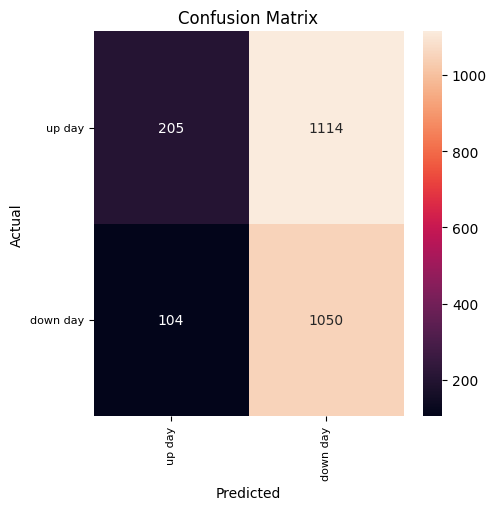

In [85]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()